In [2]:
import pandas as pd
import numpy as np

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

/Users/mirek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error

In [5]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
df.index.freq='MS'

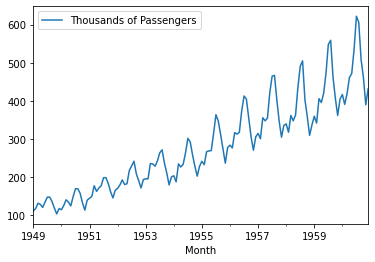

In [8]:
df.plot();

In [9]:
seasonalDecomposition=seasonal_decompose(df,model='mul')

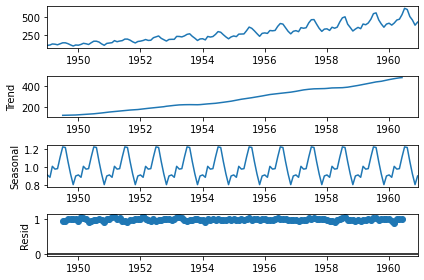

In [10]:
seasonalDecomposition.plot();

In [13]:
auto_arima(df,seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.07 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.28 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.11 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.28 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.11 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.25 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.24 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.47 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.03 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.03 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Tue, 26 Apr 2022   AIC                           1017.847
Time:                                     06:45:11   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3150     14.557      8.883      0.000     100.784     157.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
train=df.iloc[:-12]
test=df.iloc[-12:]
len(test)

12

In [15]:
model=SARIMAX(train,order=(2,1,1),seasonal_order=(0,1,0,12))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42129D+00    |proj g|=  2.27842D-01

At iterate    5    f=  3.39217D+00    |proj g|=  1.21741D-02

At iterate   10    f=  3.39006D+00    |proj g|=  2.06863D-03

At iterate   15    f=  3.39003D+00    |proj g|=  1.15951D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     32      1     0     0   1.039D-05   3.390D+00
  F =   3.3900246510399326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mirek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mirek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -447.483
Date:                             Tue, 26 Apr 2022   AIC                            902.967
Time:                                     06:45:41   BIC                            914.083
Sample:                                 01-01-1949   HQIC                           907.481
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5253      0.929     -0.566      0.572      -2.345       1.295
ar.L2          0.0110      0.275      0.040      0.968      -0.529       0.551
ma.L1          0.3064      0.935      0.328      0.743      -1.527       2.140
sigma2       108.0093     13.498      8.002      0.000      81.553     134.466
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.97   Prob(JB):                         0.50
Heteroskedasticity (H):               1.47   Skew:                            -0.09
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start=len(train)
end=start+len(test)-1
predictions=results.predict(start=start,end=end,dynamic=False).rename('SARIMA(2,1,1)(0,1,0,12)')

<AxesSubplot:xlabel='Month'>

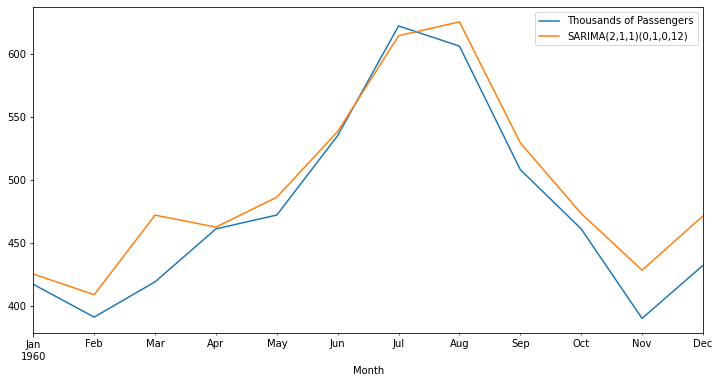

In [18]:
ax=test.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

In [19]:
mean_absolute_percentage_error(test,predictions)

0.044317548784737405

In [20]:
import scipy.stats as stats
import matplotlib.pyplot as plt

Text(0.5, 0, '')

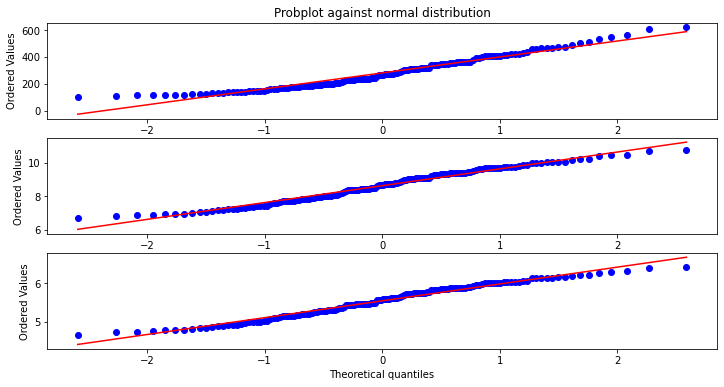

In [21]:
x=df['Thousands of Passengers']
xt, lambda_mle=stats.boxcox(x)
x_log=np.log(x)

fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=(12,6))
stats.probplot(x,dist=stats.norm,plot=ax1);
stats.probplot(xt,dist=stats.norm,plot=ax2);
stats.probplot(x_log,dist=stats.norm,plot=ax3);
ax1.set_title('Probplot against normal distribution')
ax2.set_title('')
ax3.set_title('')
ax1.set_xlabel('')



In [22]:
lambda_mle

0.14802265137037945

In [23]:
df['Log']=np.log(df["Thousands of Passengers"])
df

,Thousands of Passengers,Log
Month,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791
...,...,...
1960-08-01,606,6.406880
1960-09-01,508,6.230481
1960-10-01,461,6.133398


In [24]:
auto_arima(df['Log'],seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-480.365, Time=0.81 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-358.005, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-472.836, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-423.080, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-152.756, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-485.489, Time=0.64 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-455.362, Time=0.29 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-483.632, Time=1.63 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-479.075, Time=0.74 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=-482.918, Time=1.32 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-486.812, Time=0.54 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-455.568, Time=0.29 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-477.167, Time=0.45 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-484.812, Time=1.31 sec
 ARIMA(1,0,2)(1,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 249.648
Date:                              Tue, 26 Apr 2022   AIC                           -489.295
Time:                                      06:46:57   BIC                           -474.881
Sample:                                           0   HQIC                          -483.438
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0194      0.008      2.340      0.019       0.003       0.036
ar.L1          0.5750      0.075      7.632      0.000       0.427       0.723
ar.L2          0.2616      0.084      3.122      0.002       0.097       0.426
ma.S.L12      -0.5549      0.106     -5.225      0.000      -0.763      -0.347
sigma2         0.0013      0.000      8.856      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.47
Prob(Q):                              0.90   Prob(JB):                         0.04
Heteroskedasticity (H):               0.58   Skew:                             0.07
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
train=df.iloc[:-12]
test=df.iloc[-12:]
len(test)

12

In [27]:
model2=SARIMAX(train['Log'],order=(2,0,0),seasonal_order=(0,1,1,12))
results2=model2.fit()
results2.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.60346D+00    |proj g|=  1.42556D+00

At iterate    5    f= -1.67277D+00    |proj g|=  4.61090D+00

At iterate   10    f= -1.68643D+00    |proj g|=  7.10030D-02

At iterate   15    f= -1.68739D+00    |proj g|=  5.02994D-02

At iterate   20    f= -1.68740D+00    |proj g|=  1.44260D-01

At iterate   25    f= -1.68879D+00    |proj g|=  4.28816D-01


 This problem is unconstrained.



At iterate   30    f= -1.69873D+00    |proj g|=  2.38197D-01

At iterate   35    f= -1.69904D+00    |proj g|=  1.53912D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     79      2     0     0   1.568D-03  -1.699D+00
  F =  -1.6990374795045518     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  Log   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 224.273
Date:                              Tue, 26 Apr 2022   AIC                           -440.546
Time:                                      06:47:26   BIC                           -429.396
Sample:                                  01-01-1949   HQIC                          -436.018
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6787      0.074      9.183      0.000       0.534       0.824
ar.L2          0.3143      0.076      4.161      0.000       0.166       0.462
ma.S.L12      -0.5626      0.094     -5.992      0.000      -0.747      -0.379
sigma2         0.0013      0.000      8.170      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.98
Prob(Q):                              0.97   Prob(JB):                         0.61
Heteroskedasticity (H):               0.35   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
predictions2=results2.predict(start=start,end=end,dynamic=False).rename('LOG')

<AxesSubplot:xlabel='Month'>

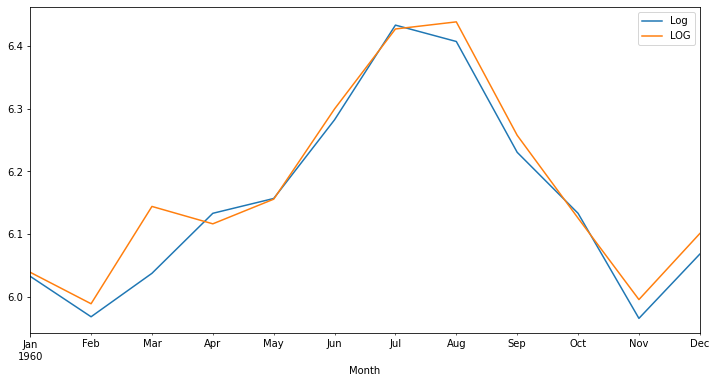

In [29]:
ax=test['Log'].plot(legend=True,figsize=(12,6))
predictions2.plot(legend=True)

In [30]:
mean_absolute_percentage_error(test['Log'],predictions2)

0.004140185361718522

In [31]:
mean_absolute_percentage_error(test['Thousands of Passengers'],np.exp(predictions2))

0.02596284258776781